In [6]:
import os
os.chdir("c:\\Users\\marti\\OneDrive\\Documents\\CS Year 2\\Group Project\\bs-meter")
import pandas
import numpy as np
from matplotlib import pyplot as plt
from website import xgb
from website.roberta import roberta_classify


C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
def get_bs_score(text):
    type, val = roberta_classify(text, "models/RoBERTa")
    if type == 0:
        val = 1 - val
    value1 = xgb.score(text)[0][1] * 100
    value2 = val * 100
    return (value1 + value2)/2


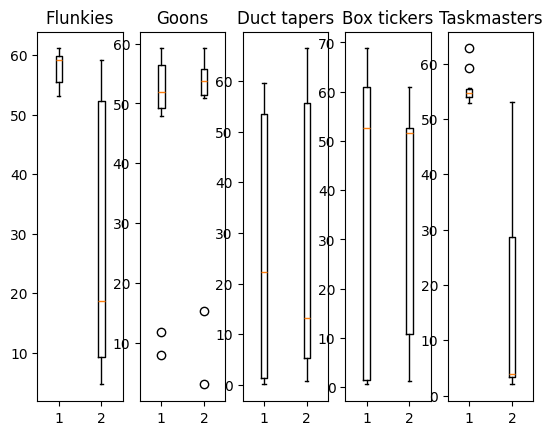

In [17]:
df = pandas.read_excel("dataset/test_data/bs_jobs.xlsx")
df = df.dropna(axis=1)
categories = ['Flunkies', 'Goons', 'Duct tapers', 'Box tickers', 'Taskmasters']

df['bs_score'] = df['Full text'].apply(get_bs_score)

fig,axs = plt.subplots(1,5)

for (i,category) in enumerate(categories):
        values = df.loc[df['Category'] == category]
        bs = values.loc[df['BS=1 Ctrl=0'] == 1]
        ctrl = values.loc[df['BS=1 Ctrl=0'] == 0]
        bs['bs_score']
        ctrl['bs_score']
        axs[i].boxplot([bs['bs_score'],ctrl['bs_score']])
        axs[i].set_title(category)

                
plt.show()